In [4]:
"""
Script for visualizing InTheWild dataset statistics and features.
This script can be converted to a Jupyter notebook using jupytext.
"""

'\nScript for visualizing InTheWild dataset statistics and features.\nThis script can be converted to a Jupyter notebook using jupytext.\n'

In [14]:
# Setup Python path
import os
import sys

# Add project root to Python path
notebook_dir = os.path.dirname(os.path.abspath(''))
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    print(f"Added {project_root} to Python path")

Added e:\PWr\deepfakes to Python path


In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from tqdm import tqdm
from utils.dataset.inthewild_extractor import extract_labels, extract_audio_files

In [16]:
# Set style for better visualizations
plt.style.use('seaborn')
sns.set_palette("husl")

C:\Users\Kacper\AppData\Local\Temp\ipykernel_15872\1253565385.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [17]:
# Set random seed for reproducibility
np.random.seed(42)

In [18]:
# Load dataset information
labels = extract_labels()
audio_files = extract_audio_files()

In [19]:
# Create DataFrame with labels
df = pd.DataFrame({
    'file': list(audio_files.keys()),
    'label': [labels[os.path.basename(f)] for f in audio_files.keys()]
})

In [20]:
# Print basic statistics
print(f"Total number of samples: {len(df)}")
print(f"\nClass distribution:")
print(df['label'].value_counts(normalize=True).apply(lambda x: f"{x:.2%}"))

Total number of samples: 31779

Class distribution:
0    62.82%
1    37.18%
Name: label, dtype: object


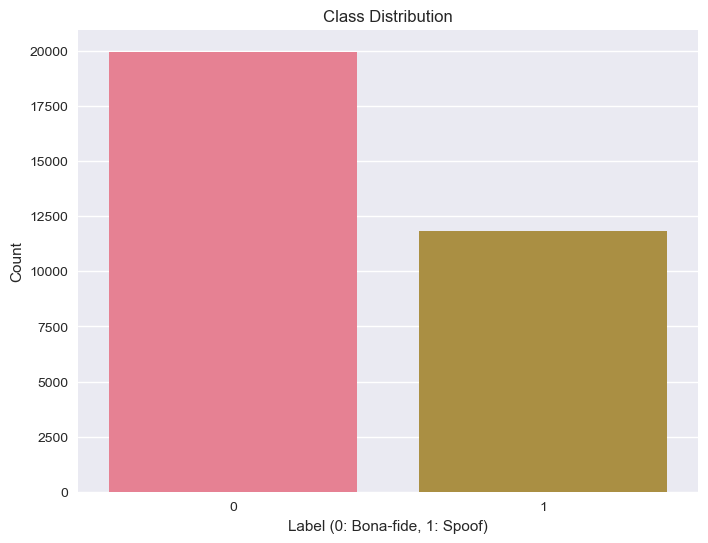

In [21]:
# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='label')
plt.title('Class Distribution')
plt.xlabel('Label (0: Bona-fide, 1: Spoof)')
plt.ylabel('Count')
plt.show()

In [23]:
def plot_waveform(audio_path, title=None):
    y, sr = librosa.load(audio_path)
    
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(title or 'Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

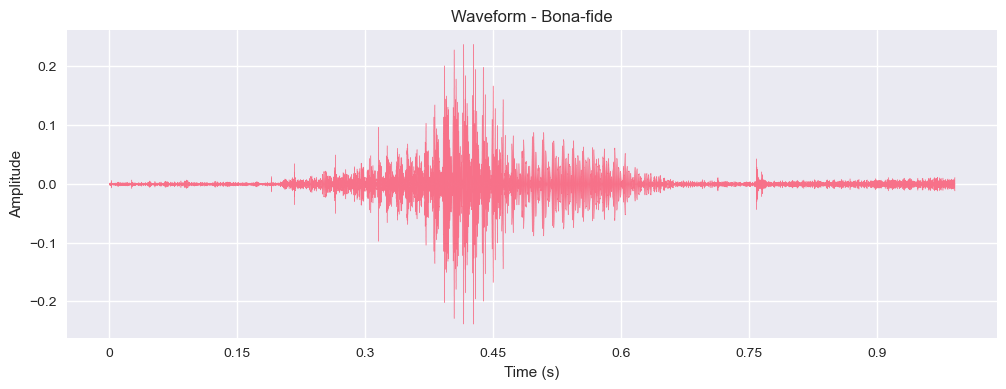

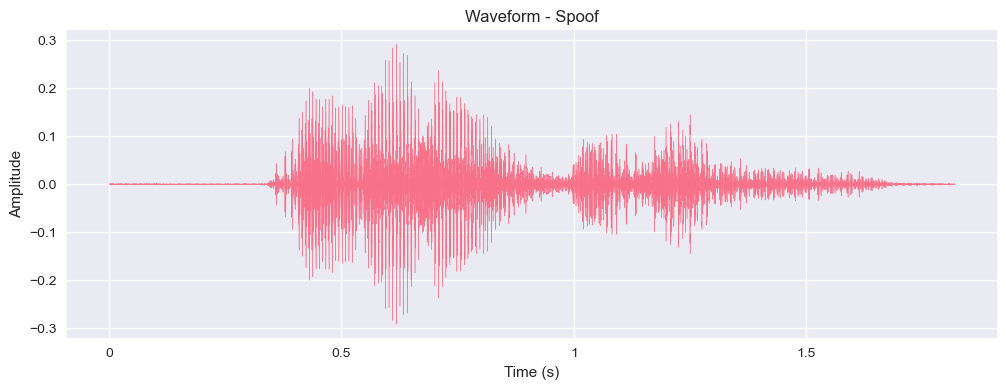

In [24]:
# Plot examples from each class
for label in [0, 1]:
    sample = df[df['label'] == label].iloc[0]
    plot_waveform(sample['file'], f'Waveform - {"Bona-fide" if label == 0 else "Spoof"}')

In [26]:
def plot_mfcc(audio_path, title=None):
    y, sr = librosa.load(audio_path)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(mfcc, sr=sr, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title or 'MFCC')
    plt.xlabel('Time (s)')
    plt.ylabel('MFCC Coefficients')
    plt.show()

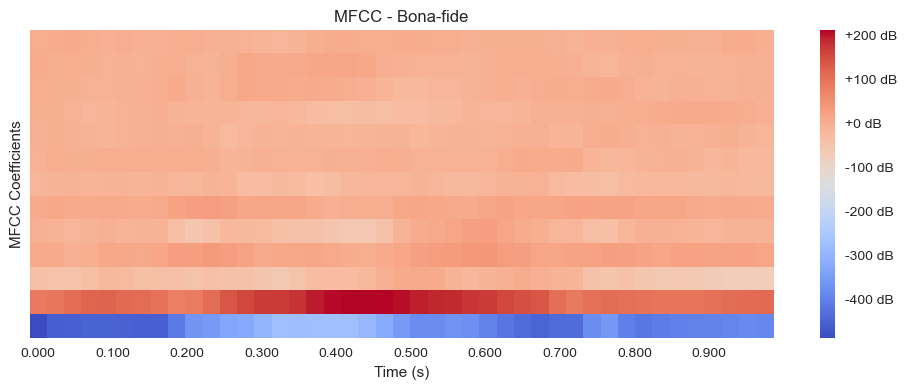

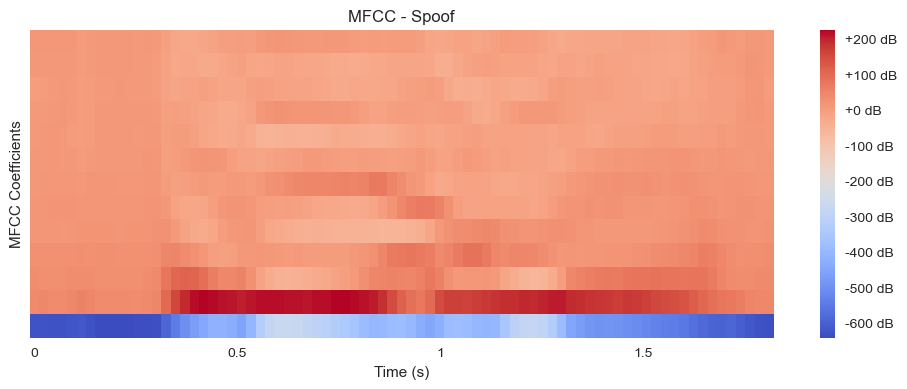

In [27]:
# Plot MFCC for examples from each class
for label in [0, 1]:
    sample = df[df['label'] == label].iloc[0]
    plot_mfcc(sample['file'], f'MFCC - {"Bona-fide" if label == 0 else "Spoof"}')

In [28]:
def plot_spectrogram(audio_path, title=None):
    y, sr = librosa.load(audio_path)
    D = librosa.stft(y)
    DB = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title or 'Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

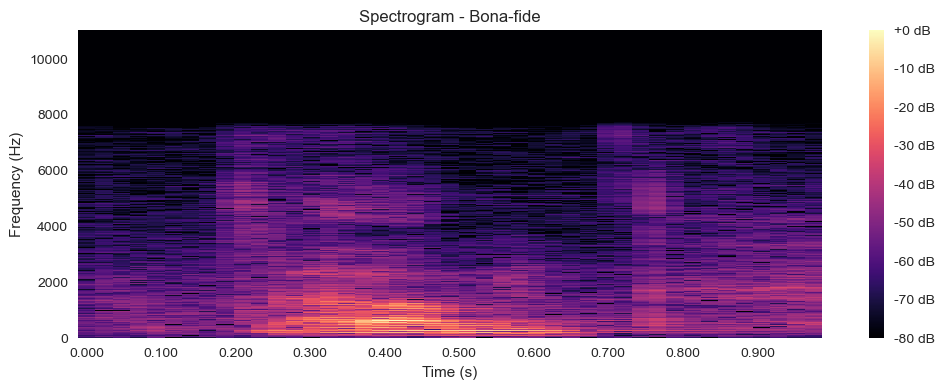

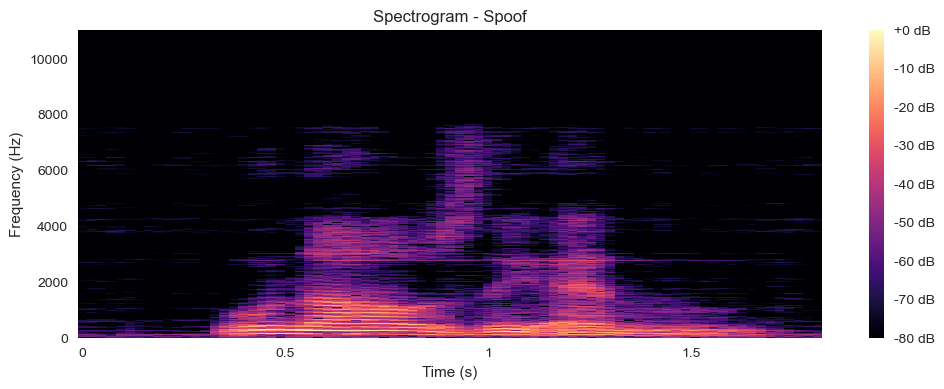

In [29]:
# Plot spectrograms for examples from each class
for label in [0, 1]:
    sample = df[df['label'] == label].iloc[0]
    plot_spectrogram(sample['file'], f'Spectrogram - {"Bona-fide" if label == 0 else "Spoof"}')

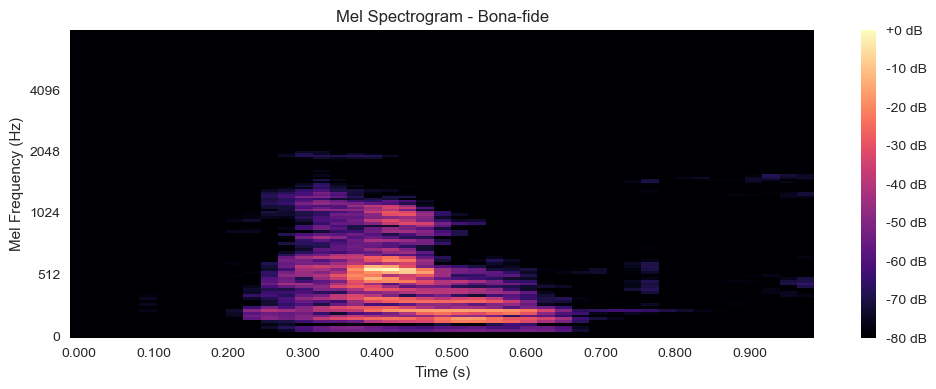

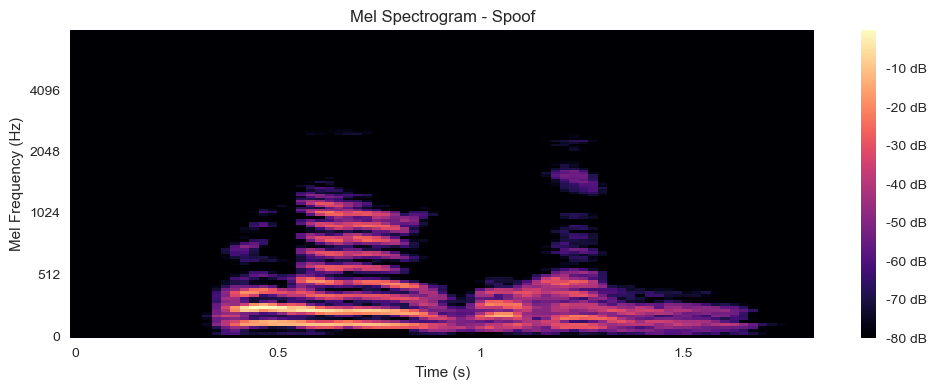

In [101]:
# Mel spectrogram
def plot_mel_spectrogram(audio_path, title=None):
    y, sr = librosa.load(audio_path)
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    DB = librosa.amplitude_to_db(np.abs(mel_spectrogram), ref=np.max)
    
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='mel', fmax=8000, cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title or 'Mel Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Mel Frequency (Hz)')
    plt.show()


for label in [0, 1]:
    sample = df[df['label'] == label].iloc[0]
    plot_mel_spectrogram(sample['file'], f'Mel Spectrogram - {"Bona-fide" if label == 0 else "Spoof"}')



In [104]:
def extract_features(audio_path):
    """Extract various audio features from a file."""
    y, sr = librosa.load(audio_path)
    
    # Extract various features
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    rms = librosa.feature.rms(y=y)
    
    return {
        'mfcc_mean': np.mean(mfcc, axis=1),
        'mfcc_std': np.std(mfcc, axis=1),
        'spectral_centroid_mean': np.mean(spectral_centroid),
        'spectral_rolloff_mean': np.mean(spectral_rolloff),
        'spectral_bandwidth_mean': np.mean(spectral_bandwidth),
        'zero_crossing_rate_mean': np.mean(zero_crossing_rate),
        'rms_mean': np.mean(rms),
        'duration': len(y) / sr
    }

In [105]:
n_samples = 1000 
features_list = []

In [106]:
for _, row in tqdm(df.sample(n_samples).iterrows(), total=n_samples):
    features = extract_features(row['file'])
    features['label'] = row['label']
    features_list.append(features)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:52<00:00, 19.15it/s]


In [107]:
# Create DataFrame with features
features_df = pd.DataFrame(features_list)
features_df

,mfcc_mean,mfcc_std,spectral_centroid_mean,spectral_rolloff_mean,spectral_bandwidth_mean,zero_crossing_rate_mean,rms_mean,duration,label
0,"[-594.85345, 166.4637, -48.796375, 46.935764, ...","[54.84885, 14.064799, 15.851441, 6.3802485, 10...",1381.869223,2846.740723,1544.267788,0.067534,0.001050,0.970068,0
1,"[-495.34882, 131.65561, -8.544544, 7.547572, -...","[130.87923, 71.37019, 45.31164, 29.470093, 30....",2136.472109,3625.888596,1725.257781,0.197310,0.010118,7.423039,1
2,"[-410.06168, 147.27133, -22.830725, 29.375078,...","[59.203156, 45.301582, 29.486591, 31.196545, 2...",1317.696902,2451.114724,1273.422354,0.081243,0.020688,9.173016,1
3,"[-359.00772, 116.154625, 12.485092, 55.766663,...","[120.59258, 40.101116, 31.59466, 28.994001, 23...",1477.806887,3484.887035,1928.335218,0.058013,0.051355,1.711066,0
4,"[-334.28305, 146.60898, 1.9753203, 45.34731, -...","[67.81975, 48.184364, 31.702927, 19.515999, 24...",1182.468440,2090.776145,1219.976365,0.071547,0.056789,2.553107,0
...,...,...,...,...,...,...,...,...,...
995,"[-436.7067, 163.30212, -24.273518, -12.225038,...","[81.96085, 62.06906, 38.077793, 30.856413, 22....",1134.255615,2035.049599,970.772355,0.082009,0.024795,3.067029,1
996,"[-359.792, 164.3361, 15.864862, 42.283028, -21...","[65.61448, 50.135773, 26.430176, 23.868563, 20...",1069.664959,1898.318481,1257.613697,0.056176,0.046901,3.899093,0
997,"[-363.3295, 147.19435, -47.057568, 25.240372, ...","[85.05525, 48.466263, 34.391174, 22.411997, 25...",1380.483173,2539.084907,1139.369516,0.093384,0.025443,11.850068,1
998,"[-448.03412, 109.996994, -22.23579, 20.08066, ...","[161.8463, 55.349953, 41.509502, 14.299846, 26...",1783.487055,3618.123269,1658.139827,0.104424,0.024916,1.814104,0


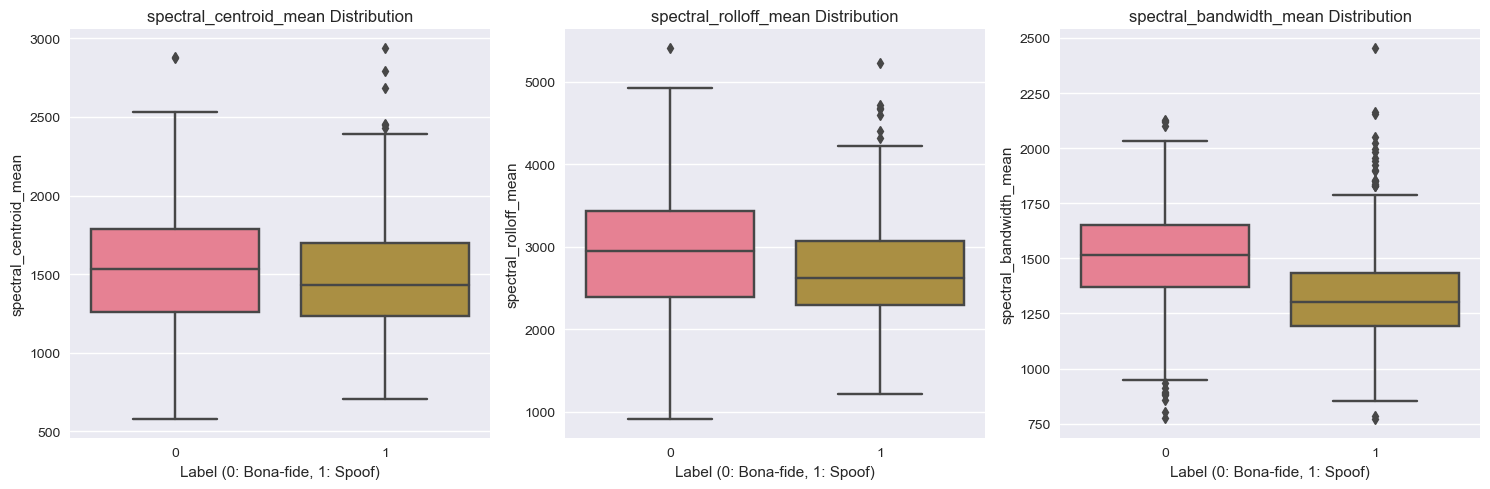

In [108]:
# Plot feature distributions
feature_cols = ['spectral_centroid_mean', 'spectral_rolloff_mean', 'spectral_bandwidth_mean']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(feature_cols):
    sns.boxplot(data=features_df, x='label', y=col, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel('Label (0: Bona-fide, 1: Spoof)')

plt.tight_layout()
plt.show()

C:\Users\Kacper\AppData\Local\Temp\ipykernel_15872\919435886.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 7, k+1 + 14*i)
C:\Users\Kacper\AppData\Local\Temp\ipykernel_15872\919435886.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 7, k+1 + 14*i)


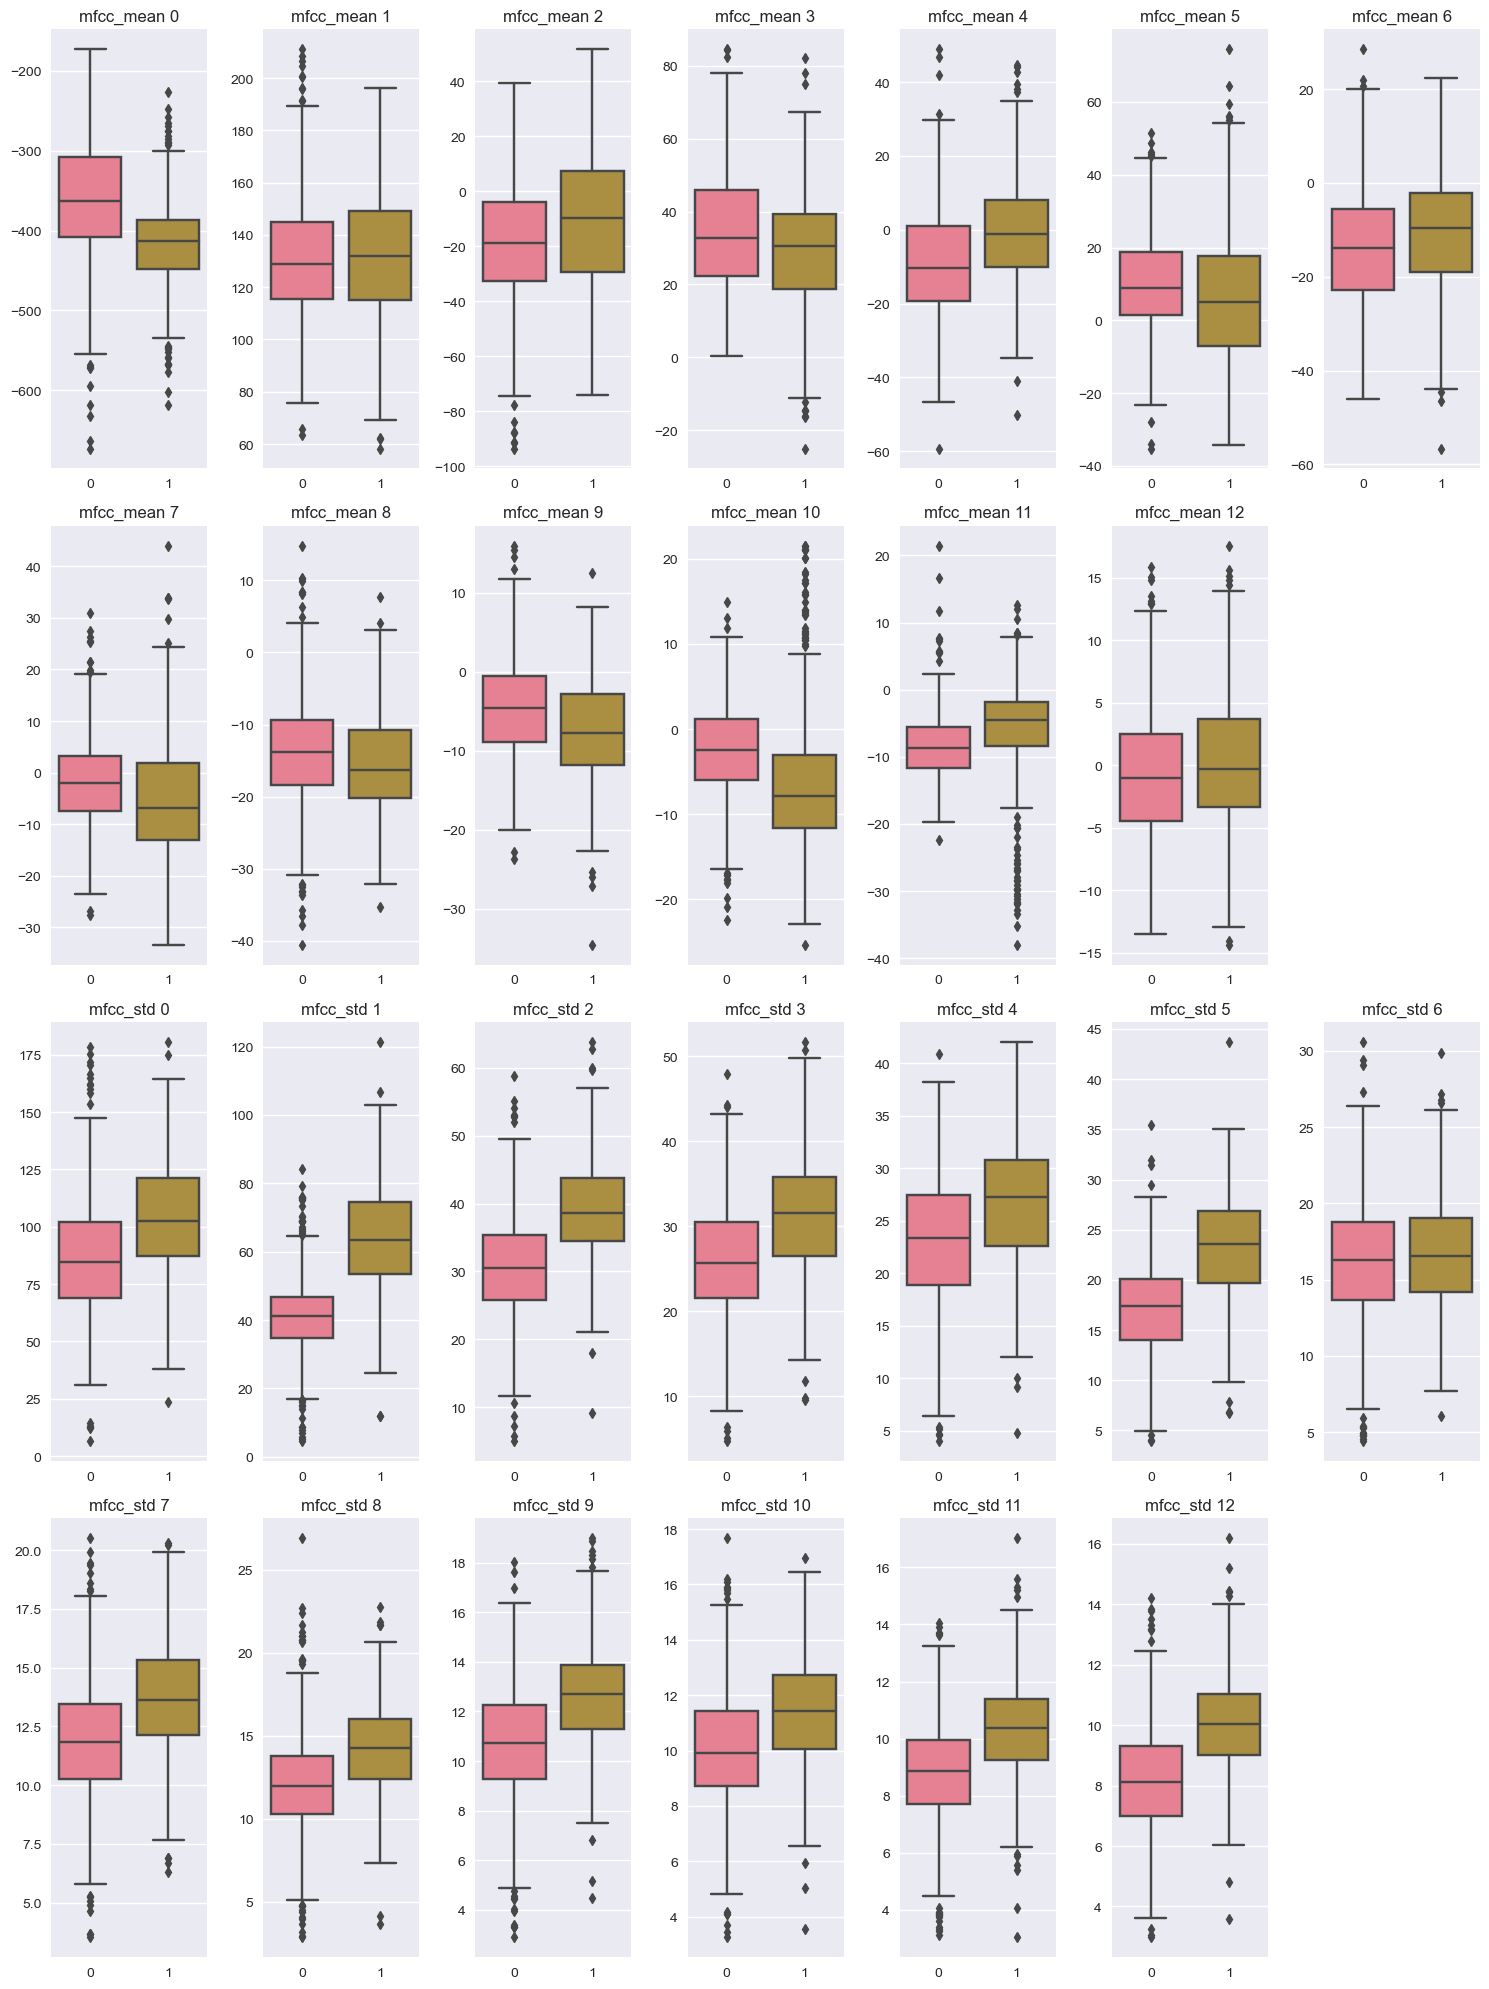

In [109]:
# Plot MFCC coefficient distributions based on label
features = ['mfcc_mean', 'mfcc_std']    
fig, axes = plt.subplots(1, 2, figsize=(15, 20))

for i, feature in enumerate(features):
    mfcc_col = feature
    mfcc_df = pd.DataFrame(features_df[mfcc_col].tolist(), index=features_df.index, columns=[f'{mfcc_col}_{i}' for i in range(13)])
    mfcc_df['label'] = features_df['label']
    mfcc_cols = [f'{mfcc_col}_{i}' for i in range(13)]

    for k, col in enumerate(mfcc_cols):
        plt.subplot(4, 7, k+1 + 14*i)
        sns.boxplot(data=mfcc_df, x='label', y=col)
        plt.title(f'{mfcc_col} {k}')
        plt.xlabel('')
        plt.ylabel('')
plt.tight_layout()
plt.show()


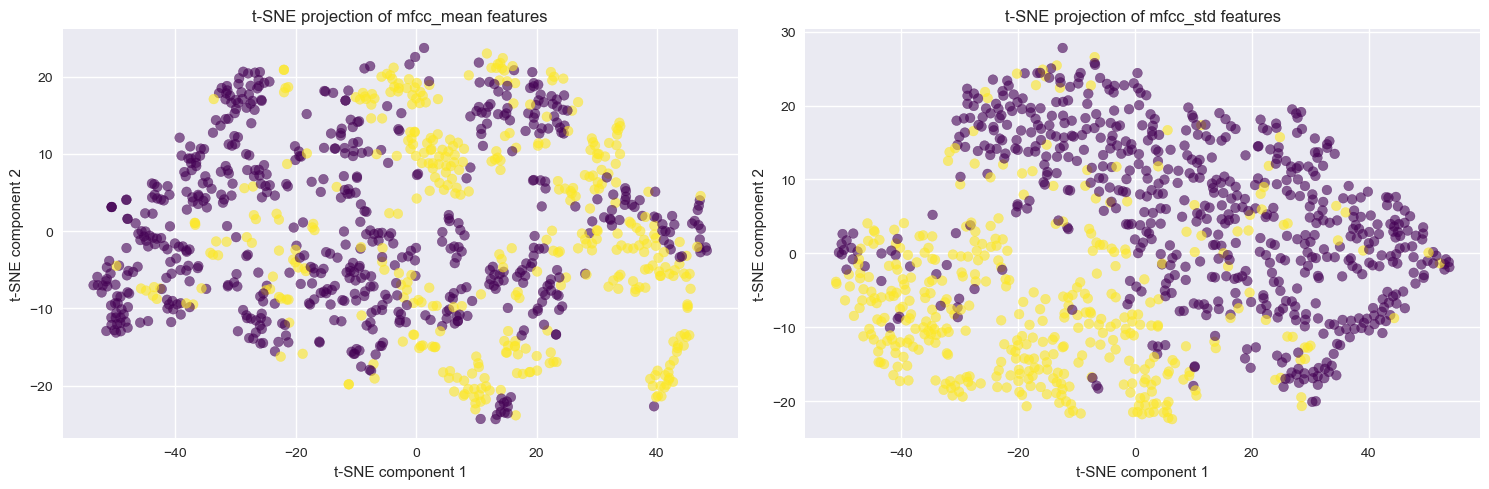

In [110]:
# Project MFCC features to 2D using t-SNE
from sklearn.manifold import TSNE

features = ['mfcc_mean', 'mfcc_std']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, feature in enumerate(features):
    X = np.array(features_df[feature].tolist())
    y = features_df['label']

    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)

    # Create scatter plot
    axes[i].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.6)
    axes[i].set_title(f't-SNE projection of {feature} features')
    axes[i].set_xlabel('t-SNE component 1')
    axes[i].set_ylabel('t-SNE component 2')

plt.tight_layout()
plt.show()



In [111]:
# Additional analysis: Feature correlations
feature_matrix = np.column_stack([features_df['mfcc_mean'].apply(lambda x: x[i]) for i in range(13)])
feature_matrix = np.hstack([
    feature_matrix,
    features_df[['spectral_centroid_mean', 'spectral_rolloff_mean', 'spectral_bandwidth_mean', 
                'zero_crossing_rate_mean', 'rms_mean', 'duration']].values
])
feature_names = [f'mfcc_{i}' for i in range(13)] + [
    'spectral_centroid_mean', 'spectral_rolloff_mean', 'spectral_bandwidth_mean', 
    'zero_crossing_rate_mean', 'rms_mean', 'duration'
]

correlation_matrix = np.corrcoef(feature_matrix.T)

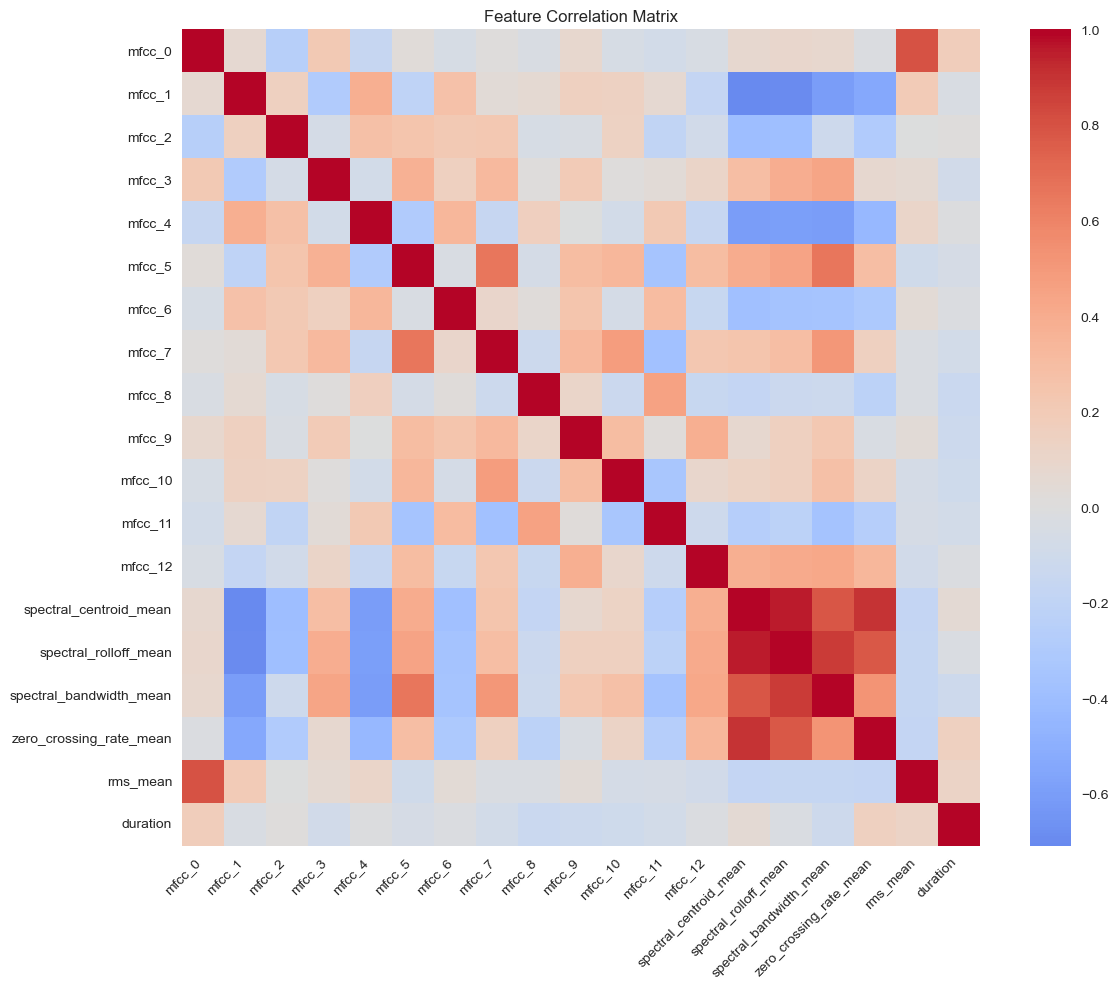

In [112]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, xticklabels=feature_names, yticklabels=feature_names, 
            cmap='coolwarm', center=0, annot=False)
plt.title('Feature Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show() 